In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("AllData.csv")

In [3]:
df.head()

,int,resp,stim,hit,frac,feedback,Subject,Block,Session,Run,Task
0,0.597781,0.524162,3.0,1.0,0.150,-56.180664,1,Short Uniform,1,1,1
1,0.598645,0.612007,3.0,1.0,0.135,8.733084,1,Short Uniform,1,1,1
2,0.448375,0.469902,1.0,1.0,0.120,18.324952,1,Short Uniform,1,1,1
3,0.827241,0.687987,6.0,0.0,0.105,-80.962945,1,Short Uniform,1,1,1
4,0.597683,0.626022,3.0,1.0,0.120,18.107234,1,Short Uniform,1,1,1


In [6]:
df["Session"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [70]:
intervals = df[df["Block"].isin(["Short Uniform", "Long Uniform"])]
intervals = intervals.round({"int": 2})

In [75]:
short = intervals[intervals["Block"] == "Short Uniform"]
long = intervals[intervals["Block"] == "Long Uniform"]

In [77]:
g = short.groupby(["int"])["resp"].mean().reset_index() * 1000
g["bias"] = g["resp"] - g["int"]

In [80]:
h = long.groupby(["int"])["resp"].mean().reset_index() * 1000
h["bias"] = h["resp"] - h["int"]

Text(0, 0.5, 'bias')

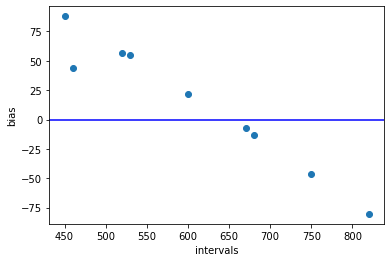

In [79]:
plt.scatter(g["int"], g["bias"])
plt.axhline(y=0, color='b', linestyle='-')
plt.xlabel("intervals")
plt.ylabel("bias")

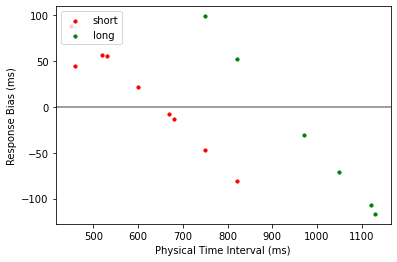

In [90]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(g["int"], g["bias"], s=10, c='r', marker="o", label='short')
ax1.scatter(h["int"], h["bias"], s=10, c='g', marker="o", label='long')
plt.axhline(y=0, color='gray', linestyle='-')
plt.legend(loc='upper left');
plt.xlabel("Physical Time Interval (ms)")
plt.ylabel("Response Bias (ms)")
plt.show()